# African Monthly Sunlight Hours By Country

This notebook scrapes and preprocesses the average number of sunlight hours per month for each African country. The data is scraped from the following Wikipedia page: https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration#Africa

Inspiration for this visualization comes from the following Tableau workbook that I adapted to Python using Seaborn and Matplotlib: https://public.tableau.com/app/profile/owen.barnes/viz/SunlightinEurope/Dashboard5

## Set Up

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

from utils import *

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Scrape Data

In [4]:
## URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration#Africa'

## Send a GET request to the URL
response = requests.get(url)

## Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

## Extract the correct table from the Wikipedia page
oceania_table = soup.find('span', {'id': 'Africa'}).find_next('table')

## Extract the rows from the HTML table
rows = oceania_table.find_all('tr')

In [5]:
df = build_table(rows)
df.drop(columns="Ref.", inplace=True)

## Preprocessing

The goal here is to aggregate the average sunlight hours by country

In [7]:
## Remove commas
df['Year'] = df['Year'].str.replace(',','')

## Drop the city column since we want to aggregate by country
df.drop(columns='City', inplace=True)

## Convert the numerical data from objects to floats
df.iloc[:,1:] = df.iloc[:,1:].astype('float')

## Calculate the mean sunlight hours by country
df = df.groupby('Country').mean().reset_index()

## Data Visualization

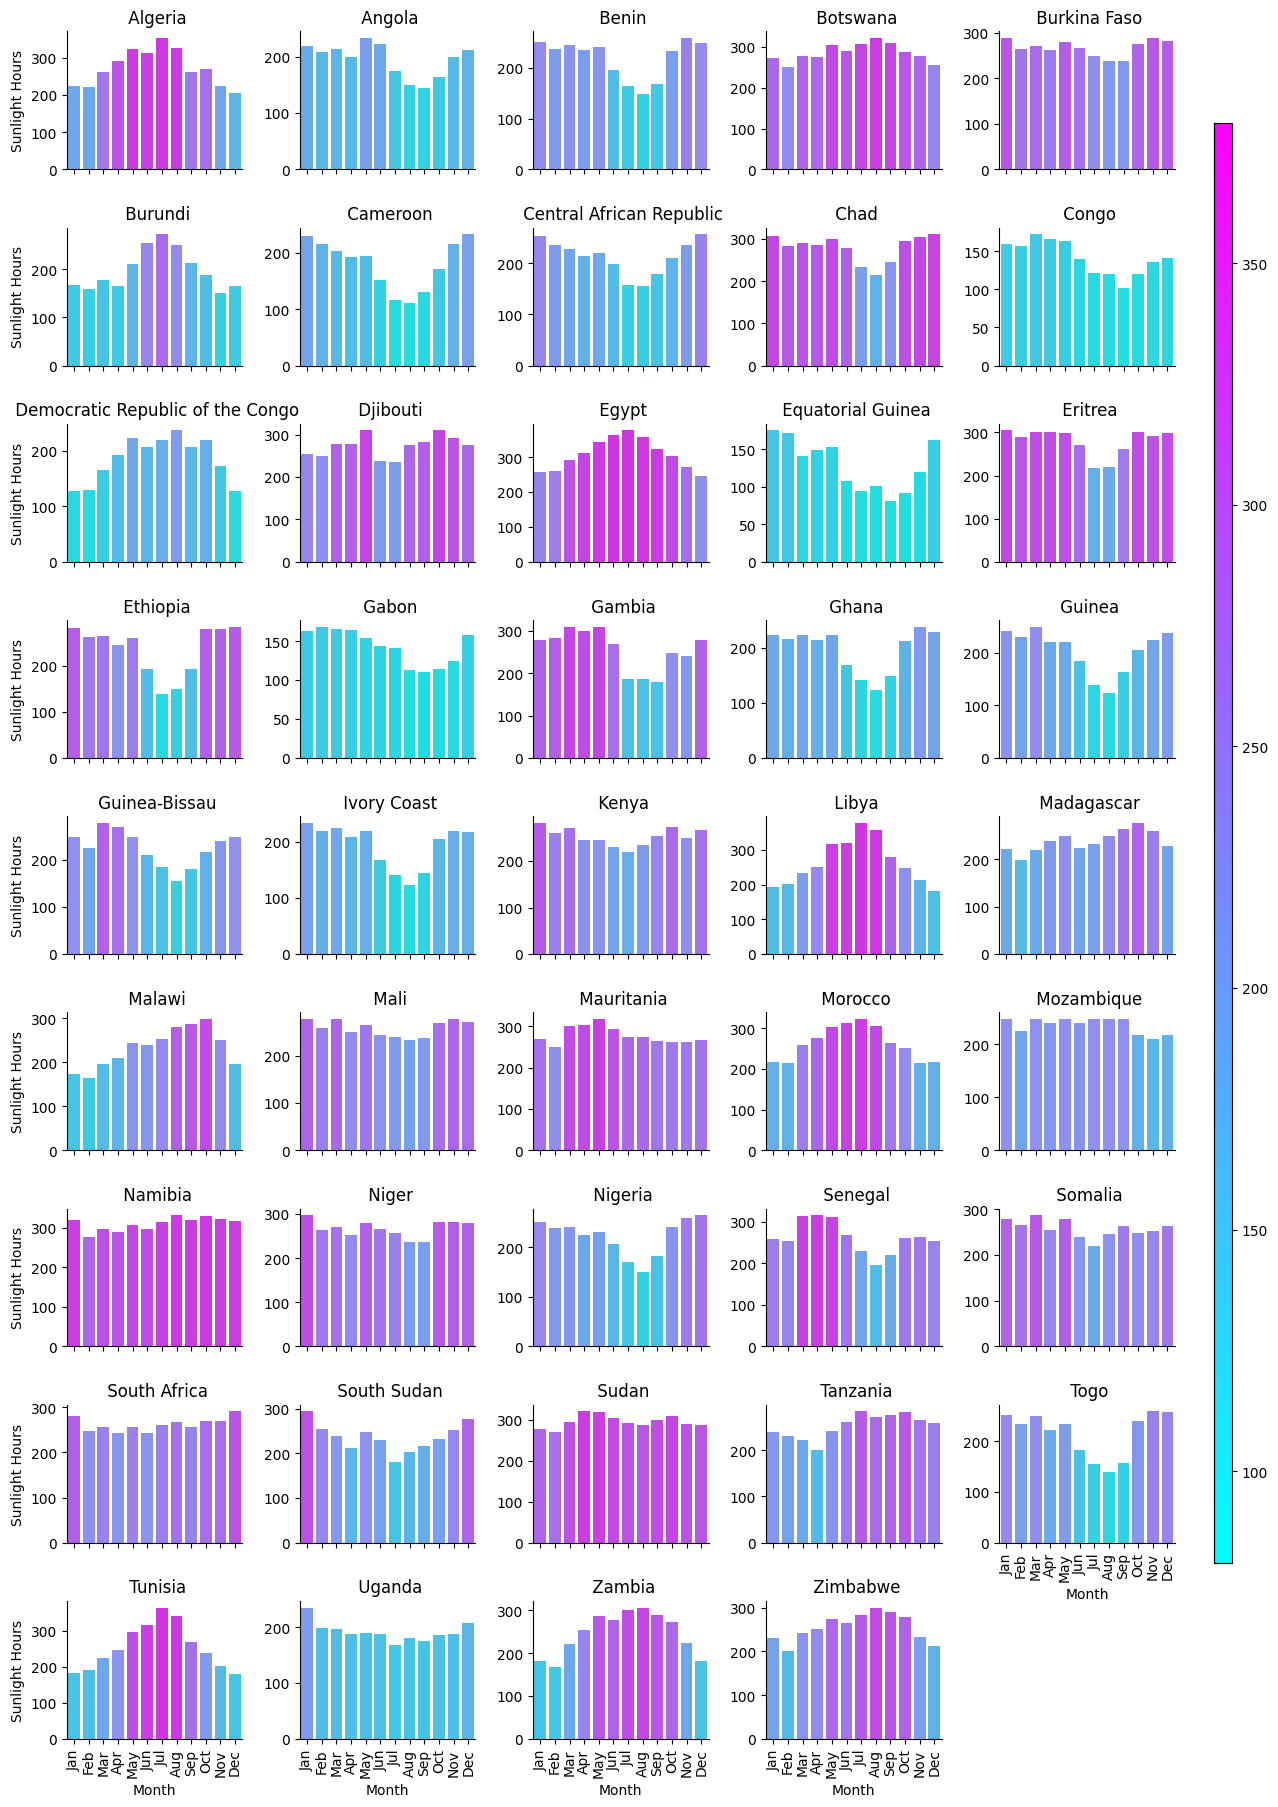

In [30]:
## Melt the data into long format
df_melt = pd.melt(df, id_vars=['Country'], var_name='Month', value_name='Sunlight Hours')

## Create a grid of bar charts using seaborn's FacetGrid, add formatting
grid = sns.FacetGrid(df_melt, col='Country', col_wrap=5, height=2, aspect=1.2, sharey=False, hue='Sunlight Hours', palette='cool')

## Plot the data as an individual bar chart in each subplot
grid.map(sns.barplot, 'Month', 'Sunlight Hours', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

## Set the titles for each subplot
for ax in grid.axes.flat:
    ax.set_title(ax.get_title().split('=')[1])
    
## Set the x-axis label for the last row of subplots
grid.axes[-1].set_xlabel('Month')

## Rotate the axis labels so that they can easily be read
for ax in grid.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

## Add a continuous colorbar
cbar_ax = grid.fig.add_axes([1.015,0.13, 0.015, 0.8])
sm = plt.cm.ScalarMappable(cmap=cm.cool, norm=mpl.colors.Normalize(vmin=81, vmax=379))
sm.set_array([])
plt.colorbar(sm, cax=cbar_ax)
    
sns.despine()
plt.show()


# Future Iterations

1. Add hover features to the bar charts.
2. Include which month had the maximum amount of sunlight hours for each country.
3. Add an interactive time series heat map of Africa for the average monthly sunlight hours.
4. Incorporate visualizations into a web app format